In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3))

In [3]:
n_agents = 1
vision = 3
n_episodes =1000
update_factor = 10000
len_game = 500
lr = 1e-3
train = trainer.Maze_Training('test',dataset,len_game,n_agents,action_type='cardinal',
                              vision=vision,n_episodes = n_episodes,lr = lr,update_factor=update_factor)
train.train(lambda_entropy=0.5)
train.save()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


episode 184 with loss 3.069828987121582
episode 205 with loss 2.7812411785125732
episode 223 with loss 2.6744117736816406
episode 235 with loss 2.159414052963257
episode 247 with loss 2.5320892333984375
episode 255 with loss 1.6413625478744507
episode 261 with loss 2.816119432449341
episode 267 with loss 2.541119337081909
episode 269 with loss 2.7667059898376465
episode 271 with loss 3.454103708267212
episode 274 with loss 3.103809356689453
episode 277 with loss 1.8982263803482056
episode 282 with loss 1.874450445175171
episode 286 with loss 1.127358078956604
episode 289 with loss 2.941765785217285
episode 292 with loss 1.2750422954559326
episode 295 with loss 1.9173550605773926
episode 298 with loss 2.340482711791992
episode 302 with loss 1.1599143743515015
episode 305 with loss 1.0608415603637695
episode 308 with loss 1.398512363433838
episode 310 with loss 1.1228934526443481
episode 312 with loss 0.951026439666748
episode 315 with loss 1.857219934463501
episode 318 with loss 1.72362

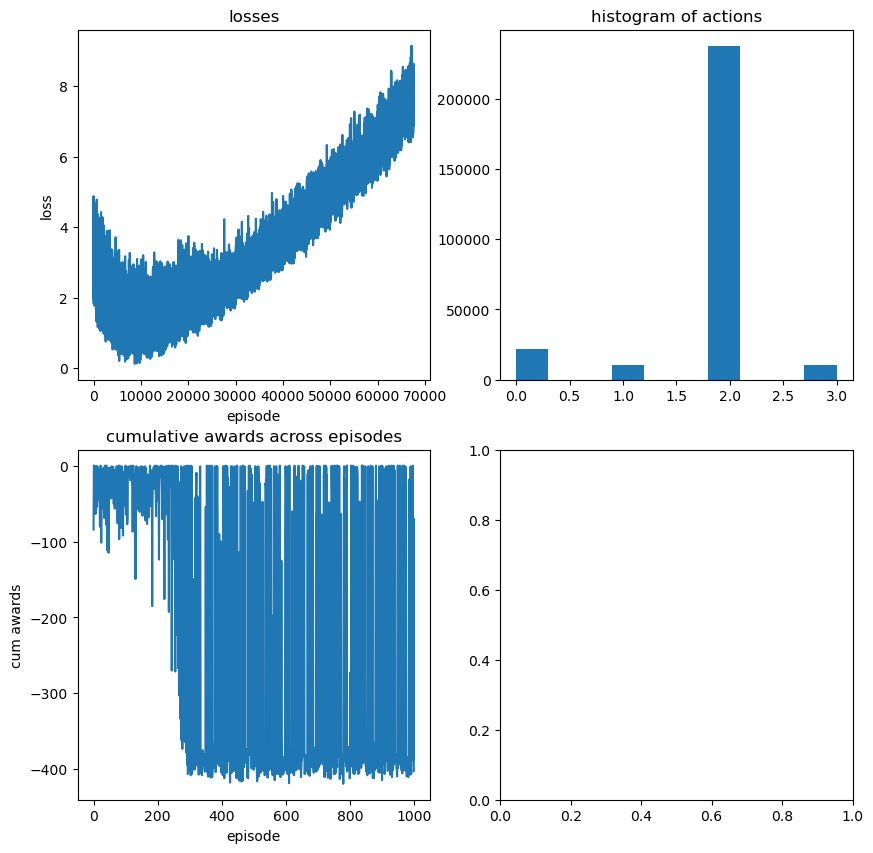

In [7]:
train.results()

In [5]:
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=50,epsilon=0,sample_prob=False)


cumulative reward: [-40.88]


In [6]:
import DQN.agent as agent

load = agent.CNN_Maze_Agents(3)
load.load('version_1')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:257: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.Q_fun.load_state_dict(torch.load(os.path.join(fd,

RuntimeError: Error(s) in loading state_dict for CNN_Q_fun:
	Missing key(s) in state_dict: "CNN_function.0.weight", "CNN_function.0.bias", "CNN_function.2.weight", "CNN_function.2.bias", "CNN_function.5.weight", "CNN_function.5.bias", "global_function.0.weight", "global_function.0.bias", "global_function.2.weight", "global_function.2.bias", "final_function.0.weight", "final_function.0.bias", "final_function.2.weight", "final_function.2.bias", "final_function.4.weight", "final_function.4.bias". 
	Unexpected key(s) in state_dict: "Q_function.0.weight", "Q_function.0.bias", "Q_function.0.running_mean", "Q_function.0.running_var", "Q_function.0.num_batches_tracked", "Q_function.1.weight", "Q_function.1.bias", "Q_function.3.weight", "Q_function.3.bias", "Q_function.6.weight", "Q_function.6.bias", "Q_function.8.weight", "Q_function.8.bias", "Q_function.10.weight", "Q_function.10.bias". 

In [7]:
load.run_agent(dataset.__getitem__(0),len_game=20)

cumulative reward: [-676]
